## 다항회귀분석 : polynomial regression
### Index
1. 샘플데이터 생성
2. 선형회귀 분석
3. 다항회귀 분석
4. 과대적합과 과소적합

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 샘플데이터 생성
- $Y= 0.5X^2 + X + 2 + \varepsilon$

In [2]:
m = 100
np.random.seed(0)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m, 1)

In [3]:
x[:3], y[:3]

(array([[0.29288102],
        [1.2911362 ],
        [0.61658026]]),
 array([[1.17062083],
        [5.02547903],
        [3.2723283 ]]))

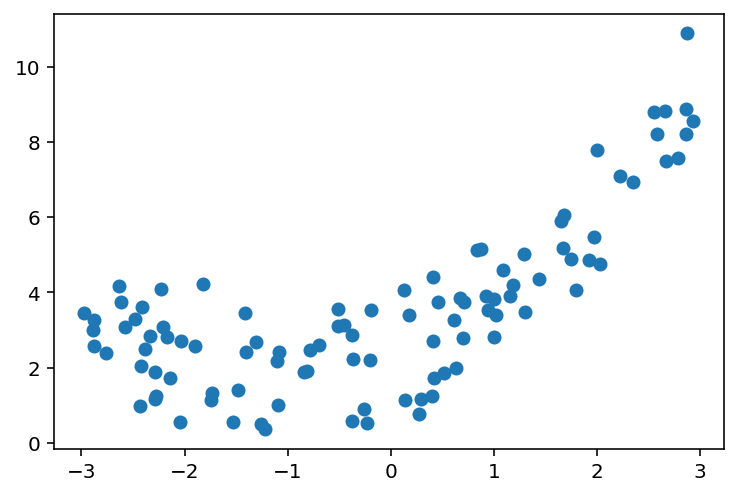

In [4]:
# 산점도
plt.scatter(x, y)
plt.show()

# 대략적으로 2차 방정식 그래프처럼 생긴 것을 확인!

#### 2. 선형회귀분석
- statsmodels 사용
- sklearn 사용

##### statsmodels 사용

In [5]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# 상수항 추가
feature = sm.add_constant(x, has_constant='add')

x[:2], feature[:2] # constant가 추가된 feature

(array([[0.29288102],
        [1.2911362 ]]),
 array([[1.        , 0.29288102],
        [1.        , 1.2911362 ]]))

In [6]:
# 모델 학습
model_1 = sm.OLS(y, feature).fit()

# 예측값 구하기
pred_1 = np.dot(feature, model_1.params)

y[:2], pred_1[:2]

(array([[1.17062083],
        [5.02547903]]),
 array([3.9425214 , 4.82666832]))

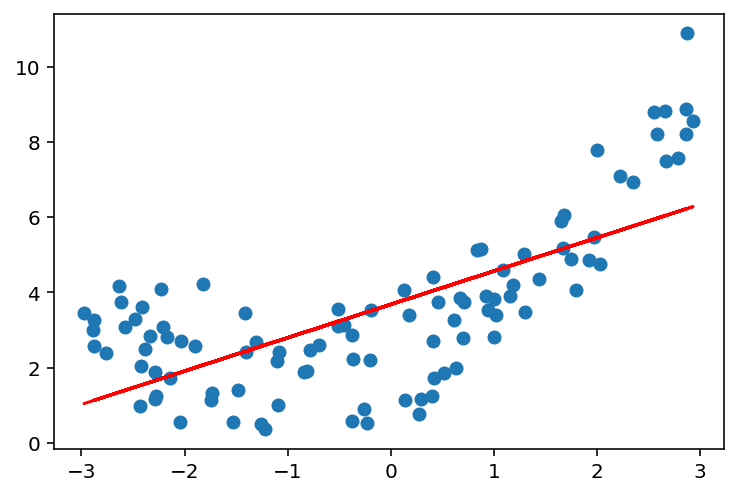

In [7]:
# 그래프 그리기
plt.scatter(x, y) # 실제 데이터
plt.plot(x, pred_1, "r") # 예측 데이터 추세선
plt.show()

In [8]:
# 회귀계수 출력, 모델 평가(MAE) : MAE > 1.2760
model_1.params, mean_absolute_error(pred_1, y)

(array([3.68311893, 0.8856923 ]), 1.2760253494659728)

In [9]:
# 0번째 데이터를 계산한결과와 0번째 예측 결과의 데이터가 같음
np.dot(feature[0], model_1.params), pred_1[0] # np.dot 행렬곱

(3.942521400486069, 3.942521400486069)

#### sklearn 사용

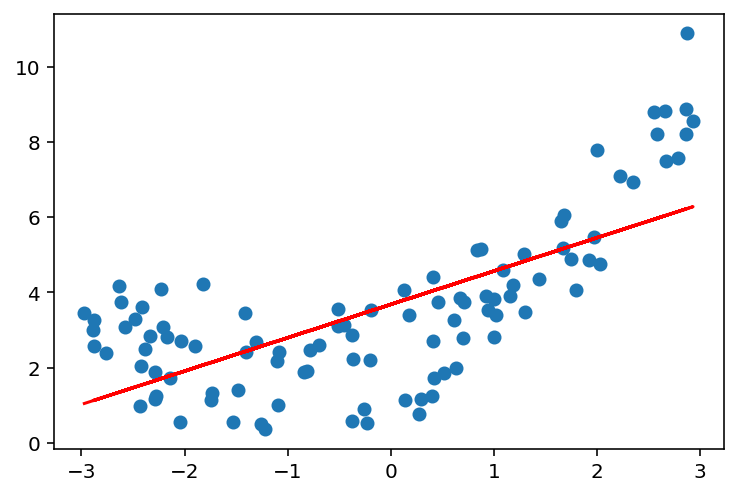

(array([3.68311893]), array([[0.8856923]]), 1.2760253494659728)

In [10]:
from sklearn.linear_model import LinearRegression

# 모델 학습
model_2 = LinearRegression().fit(x, y)

# 예측값 구하기
pred_2 = model_2.predict(x)

# 그래프 그리기
plt.scatter(x, y) # 실제 데이터
plt.plot(x, pred_2, "r") # 예측 데이터 추세선
plt.show()

# 회귀계수 출력, 모델 평가(MAE)
model_2.intercept_, model_2.coef_, mean_absolute_error(pred_2, y)

#### 3. 다항회귀분석
- statsmodels 사용
- sklearn 사용

In [11]:
# 2차 방정식으로 만들기
x[:3], x[:3]**2, np.c_[x[:3], x[:3]**2]

(array([[0.29288102],
        [1.2911362 ],
        [0.61658026]]),
 array([[0.08577929],
        [1.66703268],
        [0.38017121]]),
 array([[0.29288102, 0.08577929],
        [1.2911362 , 1.66703268],
        [0.61658026, 0.38017121]]))

In [12]:
# feature값 행렬 데이터로 변경
from sklearn.preprocessing import PolynomialFeatures

# 모델의 학습은 선형대수로 계산이 되기 때문에 제곱한 feature를 추가
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2차방정식
x_poly = poly_features.fit_transform(x)

np.hstack([x[0], x[0]**2]), x_poly[0]

(array([0.29288102, 0.08577929]), array([0.29288102, 0.08577929]))

##### statsmodels 사용

In [13]:
x_poly

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923],
       [ 0.87536468,  0.76626332],
       [-0.37447673,  0.14023282],
       [ 2.350638  ,  5.52549903],
       [ 2.78197656,  7.7393936 ],
       [-0.69935089,  0.48909166],
       [ 1.75035023,  3.06372592],
       [ 0.17336952,  0.03005699],
       [ 0.40826737,  0.16668224],
       [ 2.55357983,  6.52076995],
       [-2.57378365,  6.62436228],
       [-2.4772242 ,  6.13663975],
       [-2.87868962,  8.2868539 ],
       [ 1.99571907,  3.98289462],
       [ 1.66894051,  2.78536241],
       [ 2.22007289,  4.92872363],
       [ 2.87171005,  8.24671863],
       [ 1.79495139,  3.22185048],
       [-0.23112383,  0.05341822],
       [ 1.68317506,  2.83307827],
       [-2.29035344,  5.2457189 ],
       [ 0.83952613,  0.70480412],
       [-2.13988028,  4.57908759],
       [ 2.6680135 ,  7.11829605],
       [ 0.13108993,

In [14]:
# statsmodels 사용
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

# 상수항 추가
feature = sm.add_constant(x_poly, has_constant='add')

feature[:2]

array([[1.        , 0.29288102, 0.08577929],
       [1.        , 1.2911362 , 1.66703268]])

In [15]:
# 모델 학습
model_3 = sm.OLS(y, feature).fit()

# 예측값 구하기
pred_3 = np.dot(feature, model_3.params)

y[:2][:, 0], pred_3[:2]

(array([1.17062083, 5.02547903]), array([2.66583298, 4.35441937]))

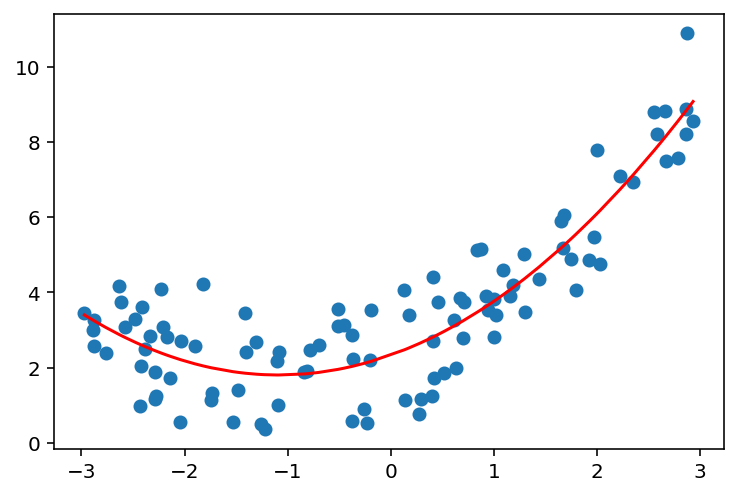

In [16]:
# 그래프 그리기
plt.scatter(x, y) # 실제 데이터

# 예측 데이터 추세선
# plt.scatter(x, pred_3)
df = pd.DataFrame({"x": x.reshape(1, -1)[0], "pred_3": pred_3}).sort_values("x") # 정렬
plt.plot(df["x"], df["pred_3"], "r")

plt.show()

In [17]:
# 회귀계수 출력, 모델 평가(MAE) : 0.827
model_3.params, mean_absolute_error(pred_3, y)

(array([2.34050076, 0.97906552, 0.44978823]), 0.8275368633442868)

##### sklearn 사용

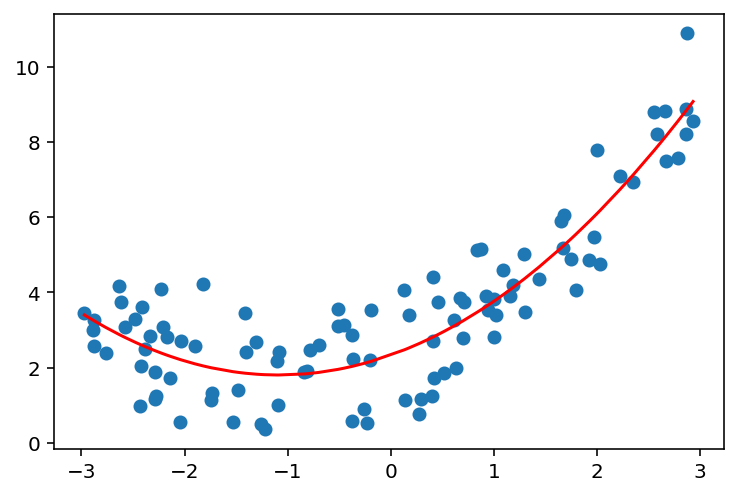

(array([2.34050076]), array([[0.97906552, 0.44978823]]), 0.8275368633442869)

In [18]:
from sklearn.linear_model import LinearRegression

# 모델 학습
model_4 = LinearRegression().fit(x_poly, y)

# 예측값 구하기
pred_4 = model_4.predict(x_poly)

# 그래프 그리기
plt.scatter(x, y) # 실제 데이터

# 예측 데이터 추세선
# plt.scatter(x, pred_4)
df = pd.DataFrame({"x": x.reshape(1, -1)[0], "pred_4": pred_4.reshape(1,-1)[0]}).sort_values("x") # 정렬
plt.plot(df["x"], df["pred_4"], "r")

plt.show()

# 회귀계수 출력, 모델 평가(MAE)
model_4.intercept_, model_4.coef_, mean_absolute_error(pred_4, y)

#### 다항회귀식
- $Y=0.5X^2+X+2$
- $\hat{Y} = 0.44978823*X^2 + 0.97906552*X  + 2.34050076$

#### 최적의 차원을 구하는 방법
- 기울기값이 급격하게 감소하는 지점이 최적의 차원 - 2차원이 최적

In [19]:
def get_mae(degree):
    
    # degree 차원으로 feature를 만듦
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    
    # 모델 학습
    model = LinearRegression().fit(x_poly, y)
    
    # 데이터 예측
    pred = model.predict(poly_features.fit_transform(x))
    
    # MAE 구함
    return mean_absolute_error(y, pred)

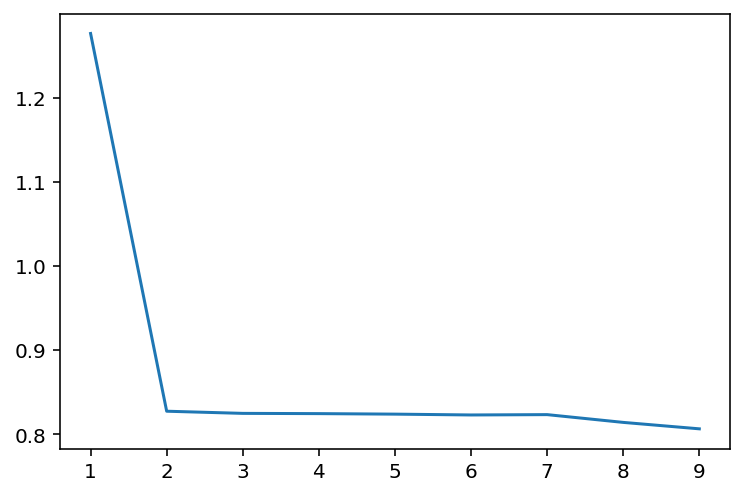

In [20]:
# 1차원 부터 10차원까지 mae 결과를 구해서 그래프로 그리기
degrees = range(1, 10)
maes = [get_mae(degree) for degree in degrees] # return값이 mae
plt.plot(degrees, maes)
plt.show()
# 3차원 이상으로 갈수록 과적합(Overfitting)되는 것을 확인
# best가 2차원

#### 과대적합과 과소적합
- 과소적합 : 1차원 
- 과대적합(과적합) : 3차원 이상